In [1]:
import json
from os import listdir, makedirs
from os.path import basename, dirname, exists, isfile, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import sys

{'std': 28.8340459629794, '75th': 138.59575, '25th': 101.58075, '50th': 118.676, 'max': 263.294, '99th': 213.28067000000001, 'CoV': 0.23742781809974187, 'min': 48.333, '1st': 67.50126, 'npoints': 22320, 'avg': 121.44341886200718}
{'std': 37.197506188565114, '75th': 15704.9, '25th': 15659.6, '50th': 15684.0, 'max': 15767.3, '99th': 15744.781, 'CoV': 0.0023722923221740477, 'min': 15300.6, '1st': 15556.219000000001, 'npoints': 22320, 'avg': 15679.984224910393}
{'std': 23.229569524103496, '75th': 173.218, '25th': 138.582, '50th': 157.313, 'max': 237.733, '99th': 202.31564, 'CoV': 0.1493826294567859, 'min': 78.032, '1st': 104.02796000000001, 'npoints': 7745, 'avg': 155.50382001291158}
{'std': 58.64970388791944, '75th': 15457.8, '25th': 15387.3, '50th': 15424.1, 'max': 15569.1, '99th': 15529.856, 'CoV': 0.00380375418547389, 'min': 14841.6, '1st': 15237.228, 'npoints': 7745, 'avg': 15418.89959974177}
{'std': 17.66802830604179, '75th': 78.082, '25th': 49.911, '50th': 65.073, 'max': 116.201, '9

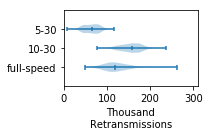

In [2]:


bw_values = dict()
retransmits = dict()

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig5/'))

def get_statistics(values, message):
	print("============================")
	result = dict()
	result["avg"] = np.mean(values)
	result["std"] = np.std(values)
	result["npoints"] = len(values)
	result["99th"] = np.percentile(values, 99)
	result["75th"] = np.percentile(values, 75)
	result["50th"] = np.percentile(values, 50)
	result["25th"] = np.percentile(values, 25)
	result["1st"] = np.percentile(values, 1)
	result["CoV"] = result["std"] / result["avg"]
	result["min"] = np.min(values)
	result["max"] = np.max(values)
	print(result)
	print("================================")
	return result

def get_bw_per_machine(machine_file, bw_values, retr):
	crnt_file = open(machine_file)
	data = json.load(crnt_file)

	no_intervals = len(data["intervals"])
	bandwidth = 0
	for i in range(0, no_intervals):
		no_bytes = data["intervals"][i]["sum"]["bits_per_second"]
		#bandwidth = (no_bytes * 8) / (10 * 1000 * 1000)
		bandwidth = no_bytes / (1000 * 1000)
		bw_values.append(bandwidth)
		retr.append(data["intervals"][i]["sum"]["retransmits"]/1000.0)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 2))
hindex = 0

dirnames = [join(inputdir,"full-speed"), join(inputdir, "10-30"), join(inputdir, "5-30")]
stats = dict()

for dir in dirnames:
	dirname = join(inputdir, dir)
	bw_values[dir] = []
	retransmits[dir] = []
	
	machine_files = [join(dirname, f) for f in listdir(dirname) if isfile(join(dirname, f)) and f.endswith(".json")]
	
	for machine_file in machine_files:
		get_bw_per_machine(machine_file, bw_values[dir], retransmits[dir])
	
	stats[dir] = get_statistics(retransmits[dir], "retransmits -> " + dir)
	get_statistics(bw_values[dir], "bandwidth -> " + dir)
	
	hindex += 1

ax.violinplot([retransmits[dirnames[0]], retransmits[dirnames[1]], retransmits[dirnames[2]]], positions=[1, 2, 3], showmedians=True, showextrema=True, vert=False)
#ax.set_ylabel("")
ax.set_ylim(0, 4)
ax.set_xlim(0, 310)
ax.set_xticks(np.arange(0, 310, 100))
plt.yticks([1, 2, 3], ["full-speed", "10-30", "5-30"])
ax.set_xlabel("Thousand\nRetransmissions")
plt.tight_layout()

plt.show()

